In [2]:
import pandas as pd  # For data handling
import matplotlib.pyplot as plt  # For simple plots

# Load the CSV file
df = pd.read_csv('ev_charging_patterns.csv')

# Display the first 5 rows to check
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [4]:
# Show basic info: columns, data types, missing values
df.info()

# Summary statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,75.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,85.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


In [5]:
# Handle missing values: Fill numerical blanks with median (or drop if preferred)
numerical_cols = ['Energy Consumed (kWh)', 'Charging Duration (hours)', 'Charging Rate (kW)', 
                  'Charging Cost (USD)', 'State of Charge (Start %)', 'State of Charge (End %)', 
                  'Distance Driven (since last charge) (km)', 'Temperature (°C)', 'Vehicle Age (years)']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())  # Use median to avoid outliers skewing

# Fix invalid SOC: Cap End % at 100
df['State of Charge (End %)'] = df['State of Charge (End %)'].clip(upper=100)

# Convert date columns to datetime
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])
df['Charging End Time'] = pd.to_datetime(df['Charging End Time'])

# Calculate actual charging duration if needed (in hours)
df['Calculated Duration (hours)'] = (df['Charging End Time'] - df['Charging Start Time']).dt.total_seconds() / 3600

# Display cleaned data preview
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),...,Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Calculated Duration (hours)
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,...,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter,0.650000
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,...,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver,2.016667
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,...,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter,2.800000
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,...,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler,3.700000
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,...,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler,1.766667


In [6]:
# Average energy consumed by location
avg_by_location = df.groupby('Charging Station Location')['Energy Consumed (kWh)'].mean().sort_values()
print("Average Energy Consumed by Location:\n", avg_by_location)

# Average charging cost by user type
avg_cost_by_user = df.groupby('User Type')['Charging Cost (USD)'].mean().sort_values()
print("\nAverage Charging Cost by User Type:\n", avg_cost_by_user)

# Count of charges by day of week
charges_by_day = df['Day of Week'].value_counts()
print("\nCharges by Day of Week:\n", charges_by_day)

# Average charging rate by charger type
avg_rate_by_charger = df.groupby('Charger Type')['Charging Rate (kW)'].mean().sort_values()
print("\nAverage Charging Rate by Charger Type:\n", avg_rate_by_charger)

Average Energy Consumed by Location:
 Charging Station Location
Los Angeles      41.477676
San Francisco    42.188413
New York         42.250576
Chicago          43.460878
Houston          44.060237
Name: Energy Consumed (kWh), dtype: float64

Average Charging Cost by User Type:
 User Type
Long-Distance Traveler    22.214583
Casual Driver             22.678176
Commuter                  22.752088
Name: Charging Cost (USD), dtype: float64

Charges by Day of Week:
 Day of Week
Saturday     205
Tuesday      200
Wednesday    197
Sunday       191
Friday       188
Monday       185
Thursday     154
Name: count, dtype: int64

Average Charging Rate by Charger Type:
 Charger Type
DC Fast Charger    25.556951
Level 1            25.978709
Level 2            26.296383
Name: Charging Rate (kW), dtype: float64


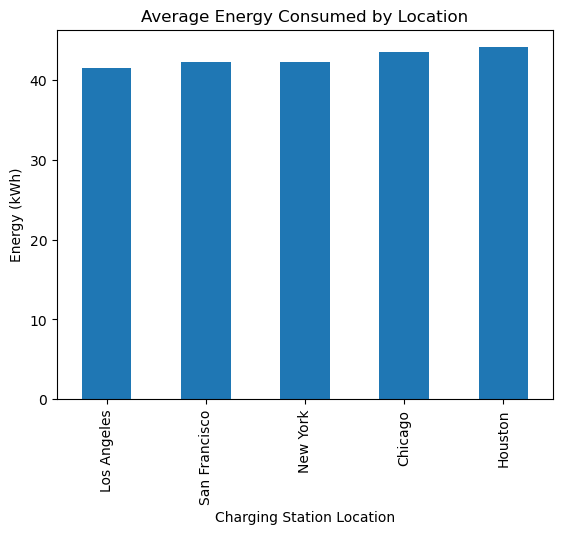

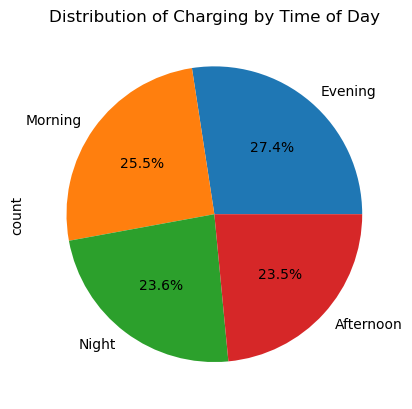

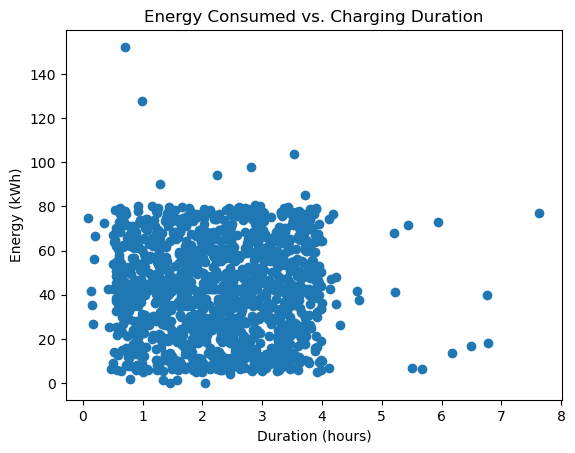

In [7]:
# Plot average energy by location
avg_by_location.plot(kind='bar', title='Average Energy Consumed by Location')
plt.ylabel('Energy (kWh)')
plt.show()

# Plot charges by time of day
df['Time of Day'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribution of Charging by Time of Day')
plt.show()

# Scatter plot: Energy vs. Duration
plt.scatter(df['Charging Duration (hours)'], df['Energy Consumed (kWh)'])
plt.xlabel('Duration (hours)')
plt.ylabel('Energy (kWh)')
plt.title('Energy Consumed vs. Charging Duration')
plt.show()

In [9]:
# Save cleaned CSV
df.to_csv('cleaned_ev_charging_patterns.csv', index=False)

# Save summary stats to Excel
df.describe().to_excel('ev_summary_stats.xlsx')